In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [19]:
# Step 1: Load & Manipulate Data

df = pd.read_csv('/content/california_housing.csv')
print("--- Step 1: Data Overview ---")
print(f"Dataset Shape: {df.shape}")
print(df.head())

# Check for missing values

print("\nMissing Values:\n", df.isnull().sum())

--- Step 1: Data Overview ---
Dataset Shape: (20640, 9)
   Income   Age     Rooms  Bedrooms  Population  Occupancy  Latitude  \
0  8.3252  41.0  6.984127  1.023810       322.0   2.555556     37.88   
1  8.3014  21.0  6.238137  0.971880      2401.0   2.109842     37.86   
2  7.2574  52.0  8.288136  1.073446       496.0   2.802260     37.85   
3  5.6431  52.0  5.817352  1.073059       558.0   2.547945     37.85   
4  3.8462  52.0  6.281853  1.081081       565.0   2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Missing Values:
 Income        0
Age           0
Rooms         0
Bedrooms      0
Population    0
Occupancy     0
Latitude      0
Longitude     0
Price         0
dtype: int64



--- Step 2: Descriptive Statistics ---
             Income           Age         Rooms      Bedrooms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

          Occupancy      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.1

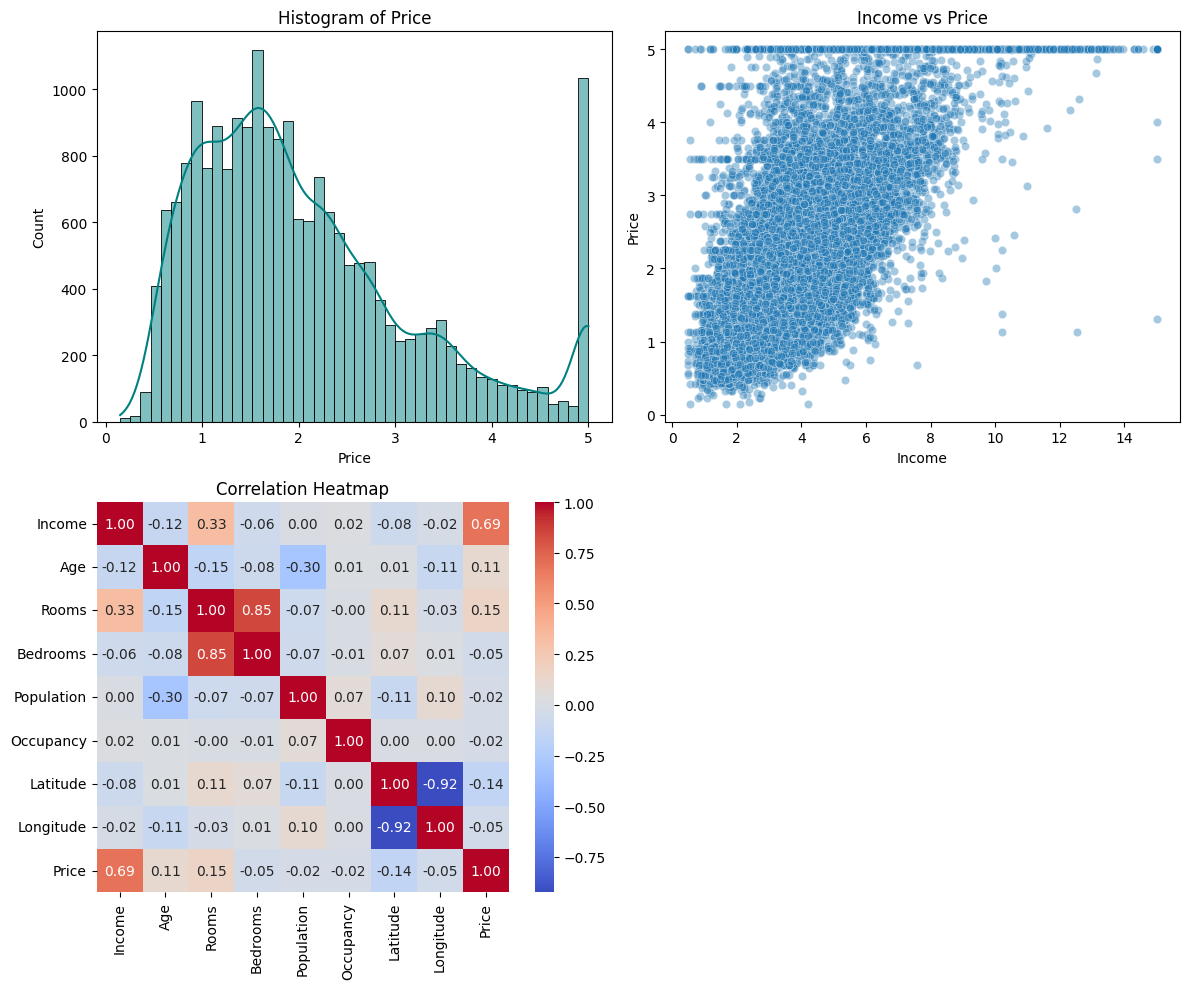

In [20]:

# Step 2: Exploratory Data Analysis

print("\n--- Step 2: Descriptive Statistics ---")
print(df.describe())

# Visualizations
plt.figure(figsize=(12, 10))

# 1. Histogram of Price
plt.subplot(2, 2, 1)
sns.histplot(df['Price'], kde=True, color='teal')
plt.title('Histogram of Price')

# 2. Scatter plot: Income vs Price
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Income', y='Price', alpha=0.4)
plt.title('Income vs Price')

# 3. Correlation Heatmap
plt.subplot(2, 2, 3)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Interpretation: Income has the highest correlation with Price (0.69).
# Price distribution shows a cap at 5.0.

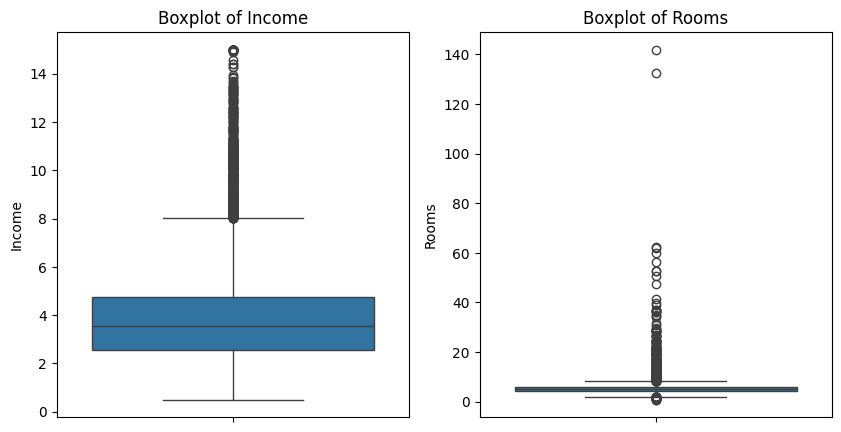

In [21]:

# Step 3: Preprocessing & Outlier Detection
# Boxplot for Outlier Detection

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Income'])
plt.title('Boxplot of Income')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Rooms'])
plt.title('Boxplot of Rooms')
plt.show()

# Capping Outliers using IQR
for col in ['Income', 'Rooms']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df[col] = np.clip(df[col], Q1 - 1.5*IQR, Q3 + 1.5*IQR)

In [22]:

# Step 4: Train-Test Split
X = df.drop('Price', axis=1)
y = df['Price']

# 80-20 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:

# Step 5: Regression Models
# A. Simple Regression (Income only)

sim_reg = LinearRegression()
sim_reg.fit(X_train[['Income']], y_train)
y_pred_sim = sim_reg.predict(X_test[['Income']])

# B. Multiple Regression (All features)

mul_reg = LinearRegression()
mul_reg.fit(X_train_scaled, y_train)
y_pred_mul = mul_reg.predict(X_test_scaled)

print("\n--- Step 5: Regression Equation (Multiple) ---")
equation = "Price = " + str(round(mul_reg.intercept_, 4))
for m, feat in zip(mul_reg.coef_, X.columns):
    equation += f" + ({round(m, 4)} * {feat})"
print(equation)


--- Step 5: Regression Equation (Multiple) ---
Price = 2.0719 + (0.8357 * Income) + (0.1402 * Age) + (-0.1333 * Rooms) + (0.1247 * Bedrooms) + (-0.0092 * Population) + (-0.0368 * Occupancy) + (-0.8471 * Latitude) + (-0.8191 * Longitude)


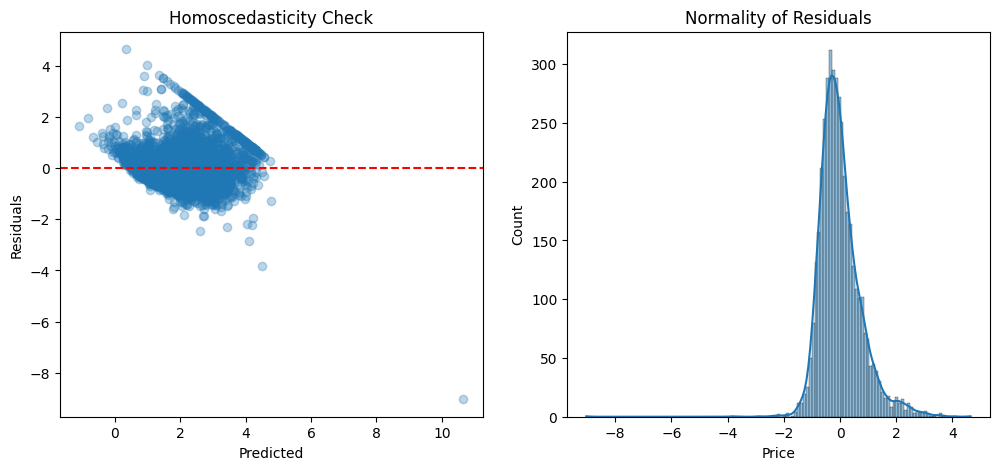

In [24]:

# Step 6: Check Assumptions
residuals = y_test - y_pred_mul

plt.figure(figsize=(12, 5))
# Homoscedasticity check
plt.subplot(1, 2, 1)
plt.scatter(y_pred_mul, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')

# Normality check
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Normality of Residuals')
plt.show()

In [25]:
residuals

,Price
20046,-0.181348
3024,-1.193015
15663,2.347041
20484,-0.797377
9814,0.153774
...,...
15362,0.550107
16623,0.566990
18086,0.757769
2144,-0.514377


In [26]:
# Step 7: Residuals & Error Metrics
mae = mean_absolute_error(y_test, y_pred_mul)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_mul))
r2 = r2_score(y_test, y_pred_mul)

print("\n--- Step 7: Error Metrics ---")
print(f"MAE: {mae:.4f} (Predictions are off by ~${mae*100:,.0f})")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f} (Model explains {r2*100:.2f}% of variation)")



--- Step 7: Error Metrics ---
MAE: 0.5464 (Predictions are off by ~$55)
RMSE: 0.7494
R2 Score: 0.5714 (Model explains 57.14% of variation)


In [27]:

# Step 8: Final Report
# Identifying most impactful variables
importance = pd.DataFrame({'Feature': X.columns, 'Weight': abs(mul_reg.coef_)})

print("\n--- Step 8: Impactful Variables ---")
print(importance.sort_values(by='Weight', ascending=False))


--- Step 8: Impactful Variables ---
      Feature    Weight
6    Latitude  0.847134
0      Income  0.835712
7   Longitude  0.819129
1         Age  0.140249
2       Rooms  0.133297
3    Bedrooms  0.124666
5   Occupancy  0.036826
4  Population  0.009203


In [28]:
import joblib
# Save the model to a file
joblib.dump(mul_reg, 'california_housing_model.pkl')

['california_housing_model.pkl']